In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [207]:
df = pd.read_csv("bank data.csv")
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [208]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
default,no,no,no,no,no,no,no,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
loan,no,no,yes,no,no,no,yes,no,no,no,...,no,no,no,no,yes,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17


In [209]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [211]:
cat_col=[n for n in df.columns if df[n].dtypes=='object']
for col in cat_col:
    print(col,'\n\n')
    print(df[col].value_counts())
    print("==============="*4)

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default 


no     44396
yes      815
Name: default, dtype: int64
housing 


yes    25130
no     20081
Name: housing, dtype: int64
loan 


no     37967
yes     7244
Name: loan, dtype: int64
contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome 


unkno

In [212]:
No_sub=len(df[df['y']=='no'])
Sub=len(df[df['y']=='yes'])
percent_No_sub=(No_sub/len(df['y']))*100
percent_sub=(Sub/len(df['y']))*100
print('percentage of subscription:',percent_sub)
print('percentage of no subscription:',percent_No_sub)

percentage of subscription: 11.698480458295547
percentage of no subscription: 88.30151954170445


<AxesSubplot:>

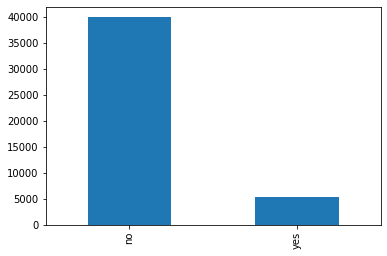

In [213]:
df['y'].value_counts().plot.bar()

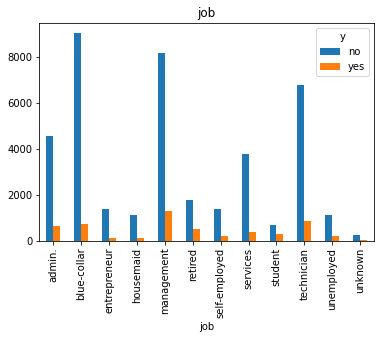

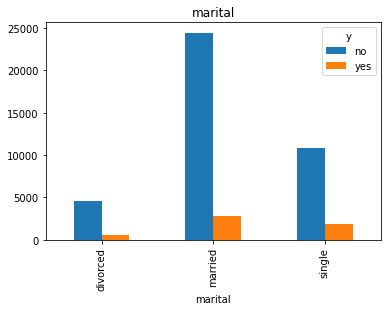

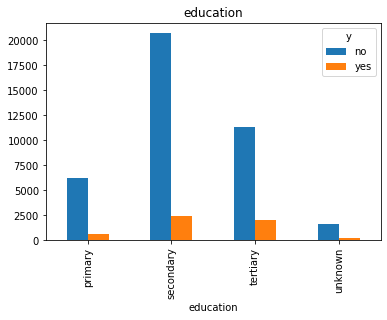

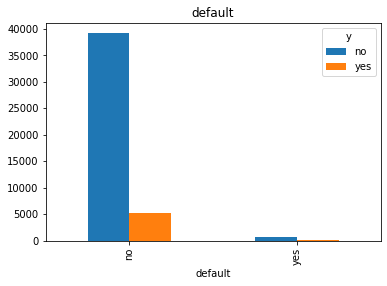

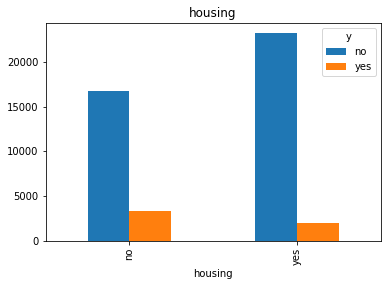

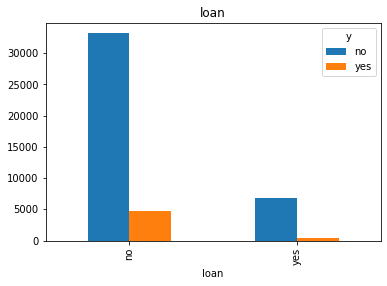

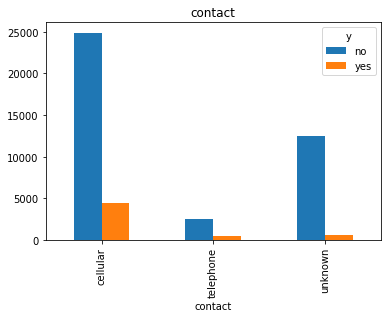

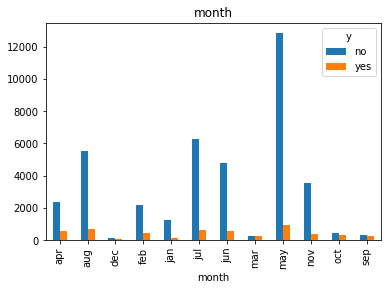

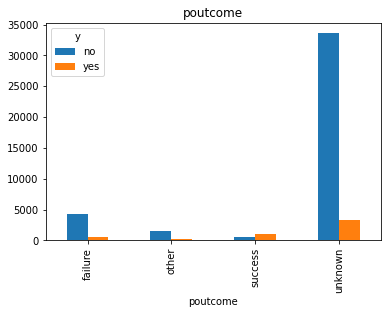

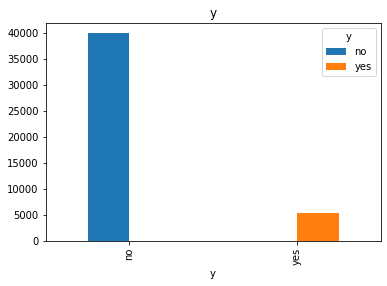

In [214]:
for col in cat_col:
    pd.crosstab(df[col],df.y).plot(kind='bar')
    plt.title(col)


C:\Users\yellapu aruna\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

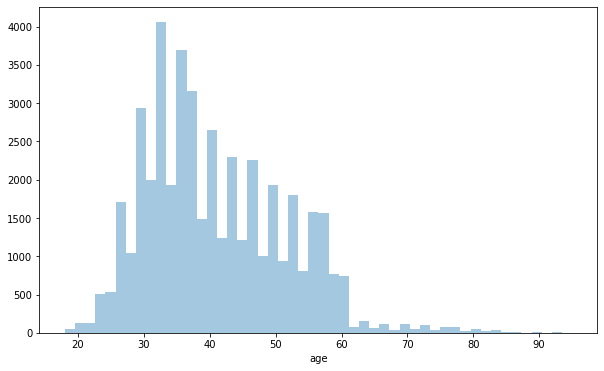

In [215]:
plt.figure(figsize=(10,6))
sns.distplot(a=df['age'],kde=False)

<AxesSubplot:xlabel='job', ylabel='count'>

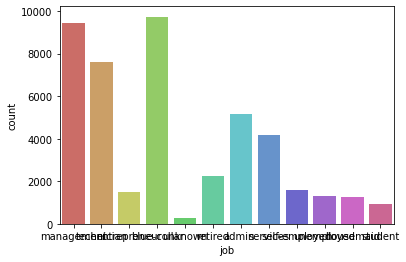

In [216]:
sns.countplot(x="job",data=df,palette="hls")


<AxesSubplot:xlabel='job'>

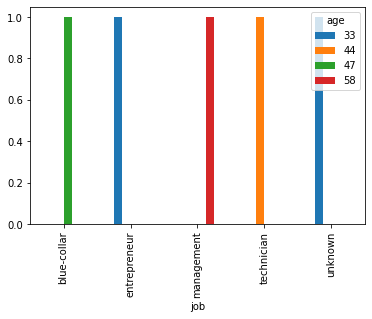

In [217]:
pd.crosstab(df.head().job,df.age).plot(kind="bar")

<AxesSubplot:xlabel='marital'>

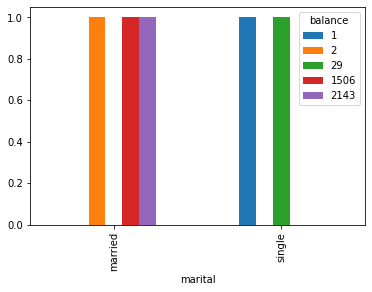

In [218]:
pd.crosstab(df.head().marital,df.balance).plot(kind="bar")

<AxesSubplot:xlabel='education'>

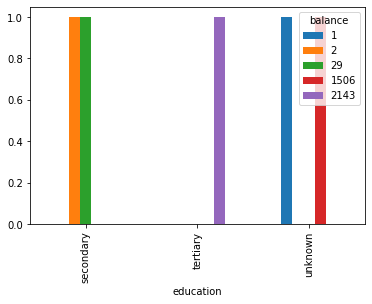

In [219]:
pd.crosstab(df.head().education,df.balance).plot(kind="bar")

In [220]:
df.shape

(45211, 17)

In [221]:
df.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [222]:
df.shape

(45211, 17)

In [223]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

In [224]:
#I dont have any null values

In [225]:
df['pdays_no_contact']=(df['pdays']==-1)*1
contact=({'cellular':0,'telephone':1})
df['contact']=df['contact'].map(contact)

In [226]:
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','month','poutcome'])
df


,age,balance,contact,day,duration,campaign,pdays,previous,y,pdays_no_contact,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,NaN,5,261,1,-1,0,no,1,...,0,0,1,0,0,0,0,0,0,1
1,44,29,NaN,5,151,1,-1,0,no,1,...,0,0,1,0,0,0,0,0,0,1
2,33,2,NaN,5,76,1,-1,0,no,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,NaN,5,92,1,-1,0,no,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,NaN,5,198,1,-1,0,no,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0.0,17,977,3,-1,0,yes,1,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,0.0,17,456,2,-1,0,yes,1,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,0.0,17,1127,5,184,3,yes,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,1.0,17,508,4,-1,0,no,1,...,0,0,0,1,0,0,0,0,0,1


In [227]:
# Model building 
from sklearn.linear_model import LogisticRegression
X = df.loc[:,df.columns!='y']
y = df.loc[:,df.columns=='y']
classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [228]:
df.shape

(45211, 51)

In [229]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns!='y']
y = df.loc[:,df.columns=='y']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [230]:
print('Length of X_train : ',len(X_train),'\n length of Y_train :',len(Y_train))
print('\n Lenth of X_test : ',len(X_test), '\n length of Y_test  :',len(Y_test))

Length of X_train :  31647 
 length of Y_train : 31647

 Lenth of X_test :  13564 
 length of Y_test  : 13564


In [231]:
import pandas as pd
def clean_dataset(df):
    assert isinstance(df,pd.DataFrame),"df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep=~df.isin([np.nan,np.inf,-np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [232]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,Y_train)
print('Train Accuracy :',clf.score(X_train,Y_train))
print('Test Accuracy :',clf.score(X_test,Y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [233]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.